In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import imp
import sys
import pickle as plk
import importlib.util
from numpy.lib.scimath import sqrt as csqrt
from IPython.display import display, Math, clear_output
from scipy.signal import find_peaks

###############################################################
#LINUX PATH

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/Ring-Resonator/Tutorial/')) #Current directory

###############################################################
#WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('C:/Users/Léo/Documents/Facul/Capacitação/GitHub/90--optical-hybrid'))
spec_win.loader.exec_module(lumapi)

def fwhm(band, reflection, dB):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(reflection)
    rmax = reflection[peak[np.argmax(reflection[peak])]]

    min = 0
    max = 0

    if dB == True: 
        dB = 3
        rmax = rmax-dB
    else: 
        dB = 0 
        rmax = rmax/2

    for i in range(peak[np.argmax(reflection[peak])], 0, -1):
        if (reflection[i] <(rmax) and reflection[i+1] < (rmax)):
            min = i
            break

    for i in range(peak[np.argmax(reflection[peak])], len(band) - 1):
        if (reflection[i-1] > (rmax) and reflection[i] < (rmax)):
            max = i
            break

    print('FWHM = '+ str(np.round((abs(band[max]-band[min]))*1e9,4)) + 'nm')

    r = (reflection[min] +reflection[max])/2

    
    return r,min,max

C:\Users\Léo\AppData\Local\Temp\ipykernel_16712\3921159285.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


# MMI 2x2

In [2]:
fdtd = lumapi.FDTD(filename="../CML/MMI_2X2.fsp")

In [3]:
# Creating the polygones used on the guide and defining some variables

W1 = 1.48e-6 # Article values
W2 = 1.48e-6
W3 = 1.6e-6
W4 = 0.5e-6
W5 = 0.7e-6
W6 = 0.2e-6
L1 = 1e-6
L2 = 2.4e-6
L3 = 1.6e-6
height = 0.22e-6

width = 0.5e-6 # Some helpful variables
xspan = 5e-6
yspan = 2e-6
core = 'Si (Silicon) - Palik'
substract = 'SiO2 (Glass) - Palik'

# Defining the structure of the polygones  

Poly1 = np.transpose([[0,  (W6/2 + (W5-W4)/2) + W4],
         [0,  (W6/2 + (W5-W4)/2)],
         [L1, (W6)/2],
         [L1, (W6/2+W5)]])

Poly2 = np.transpose([[0, -(W6/2 + (W5-W4)/2) - W4],
         [0, -(W6/2 + (W5-W4)/2)],
         [L1, -(W6)/2],
         [L1, -(W6/2+W5)]])

Poly3 = np.transpose([[L1, (W6/2+W5)],
         [L1+L2, (W1/2)],
         [L1+L2, -(W1/2)],
         [L1, -(W6/2+W5)]])

Poly4 = np.transpose([[L1+L2, (W1/2)],
         [L1+L2+L3, W2/2],
         [L1+L2+L3, -W2/2],
         [L1+L2, -(W1/2)]])

Poly5 = np.transpose([[L1+L2+L3, W2/2],
         [L1+L2+2*L3, (W1/2)],
         [L1+L2+2*L3, -(W1/2)],
         [L1+L2+L3, -W2/2]])

Poly6 = np.transpose([[L1+L2+2*L3, (W1/2)],
         [L1+2*L2+2*L3, W3/2],
         [L1+2*L2+2*L3, -W3/2],
         [L1+L2+2*L3, -(W1/2)]])

Poly7 = np.transpose([[2*L1+2*L2+2*L3, (W6/2 + (W5-W4)/2) + W4],
         [2*L1+2*L2+2*L3,  (W6/2 + (W5-W4)/2)],
         [L1+2*L2+2*L3, (W6)/2],
         [L1+2*L2+2*L3, (W6/2+W5)]])

Poly8 = np.transpose([[2*L1+2*L2+2*L3, -(W6/2 + (W5-W4)/2) - W4],
         [2*L1+2*L2+2*L3,  -(W6/2 + (W5-W4)/2)],
         [L1+2*L2+2*L3, -(W6)/2],
         [L1+2*L2+2*L3, -(W6/2+W5)]])


In [43]:
#Creating MMI structure based on the article

fdtd.selectall()
fdtd.delete()

fdtd.addpoly()
fdtd.addtogroup('MMI') # Adding all polygones on the same group
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0,
})
fdtd.set('vertices', Poly1) # Setting the vertices based on the created arrays
fdtd.set('name', 'Poly1')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly2)
fdtd.set('name', 'Poly2')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly3)
fdtd.set('name', 'Poly3')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly4)
fdtd.set('name', 'Poly4')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly5)
fdtd.set('name', 'Poly5')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly6)
fdtd.set('name', 'Poly6')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly7)
fdtd.set('name', 'Poly7')
fdtd.set('z span', height)
fdtd.set('material', core)

fdtd.addpoly()
fdtd.addtogroup('MMI')
fdtd.set({
    'x' : 0,
    'y' : 0,
    'z' : 0
})
fdtd.set('vertices', Poly8)
fdtd.set('name', 'Poly8')
fdtd.set('z span', height)
fdtd.set('material', core)


In [47]:
# Creating bends and rectangles used on the simulation

fdtd.unselectall()
fdtd.addobject('s_bend_wg') # Creating the bend
fdtd.addtogroup('Bends') # Adding the bends on the same group
fdtd.set({'name' :'bend1',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :0,
    'y'          :W6/2 + W5/2,
    'z'          :0,
    'base angle' :90,
    'base width' :width,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':height
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg')
fdtd.addtogroup('Bends')
fdtd.set({
    'name'       :'bend2',
    'x'          : -(L1+L2+L3),
    'y'          :-2e-6 - W6/2 - W5/2,
    'z'          :0,
    'base angle' :90,
    'base width' :width,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':height
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg')
fdtd.addtogroup('Bends')
fdtd.set({
    'name'       :'bend3',
    'x'          :2*L1+2*L2+2*L3,
    'y'          :W6/2 + W5/2,
    'z'          :0,
    'base angle' :90,
    'base width' :width,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':height
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg')
fdtd.addtogroup('Bends')
fdtd.set({'name' :'bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :2*L1+2*L2+2*L3+xspan,
    'y'          :-W6/2 - W5/2 - yspan,
    'z'          :0,
    'base angle' :90,
    'base width' :width,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':height
})

fdtd.unselectall()
fdtd.addrect() # Creating the rectangles
fdtd.addtogroup('Extensions') # Adding the rectangles on the same group
fdtd.set({
    'name'    :'extension1',
    'x'       :-xspan - width,
    'x span'  :1e-6,
    'y'       :W6/2 + W5/2 + yspan,
    'y span'  :width,
    'z'       :0,
    'z span'  :height,
    'material':core
})

fdtd.unselectall()
fdtd.addrect()
fdtd.addtogroup('Extensions')
fdtd.set({
    'name'    :'extension2',
    'x'       :-xspan - width,
    'x span'  :1e-6,
    'y'       :-W6/2 - W5/2 - yspan,
    'y span'  :width,
    'z'       :0,
    'z span'  :height,
    'material':core
})

fdtd.unselectall()
fdtd.addrect()
fdtd.addtogroup('Extensions')
fdtd.set({
    'name'    :'extension3',
    'x'       :2*(L1+L2+L3) + xspan + 0.5e-6,
    'x span'  :1e-6,
    'y'       :W6/2 + W5/2 + yspan,
    'y span'  :width,
    'z'       :0,
    'z span'  :height,
    'material':core
})

fdtd.unselectall()
fdtd.addrect()
fdtd.addtogroup('Extensions')
fdtd.set({
    'name'    :'extension4',
    'x'       :2*(L1+L2+L3) + xspan + 0.5e-6,
    'x span'  :1e-6,
    'y'       :-W6/2 - W5/2 - yspan,
    'y span'  :width,
    'z'       :0,
    'z span'  :height,
    'material':core
})

In [79]:
# Creating simulation region and ports

fdtd.unselectall()
fdtd.addfdtd()
fdtd.set({
    'x'            : (L1+L2+L3),
    'x span'       : 2*(L1+L2+L3+xspan) + 2e-6,
    'y'            : 0,
    'y span'       : 5*yspan,
    'z'            : 0,
    'z span'       : 5e-6,
    'mesh accuracy': 4, 
    'z min bc'     : 'PML', # Defining boundaries as PML
    'z max bc'     : 'PML',
    'y max bc'     : 'PML',
    'y min bc'     : 'PML',
    'background material' : substract # Using SiO2 on the substract
})

# Creating the ports
fdtd.unselectall()
fdtd.addport() 
fdtd.set({
    'x'      : -xspan - width,
    'y'      : W6/2 + W5/2 + yspan,
    'y span' : 4e-6,
    'z'      : 0,
    'z span' : 4e-6
})

fdtd.unselectall()
fdtd.addport()
fdtd.set({
    'x'      : -xspan - width,
    'y'      : -(W6/2 + W5/2 + yspan),
    'y span' : 4e-6,
    'z'      : 0,
    'z span' : 4e-6
})

fdtd.unselectall()
fdtd.addport()
fdtd.set({
    'x'        : 2*(L1+L2+L3) + xspan + 0.5e-6,
    'y'        : W6/2 + W5/2 + yspan,
    'y span'   : 4e-6,
    'z'        : 0,
    'z span'   : 4e-6,
    'direction': 'Backward'
})

fdtd.unselectall()
fdtd.addport()
fdtd.set({
    'x'      : 2*(L1+L2+L3) + xspan + 0.5e-6,
    'y'      : -(W6/2 + W5/2 + yspan),
    'y span' : 4e-6,
    'z'      : 0,
    'z span' : 4e-6,
    'direction': 'Backward'
})

# Setting monitor points
fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points', 200)

fdtd.unselectall()
fdtd.addprofile() # Creating Field monitor
fdtd.set({
    'x'            : (L1+L2+L3),
    'x span'       : 2*(L1+L2+L3+xspan) + 2e-6,
    'y'            : 0,
    'y span'       : 5*yspan,
    'z'            : 0,
    'override global monitor settings':1,
    'frequency points': 200
})

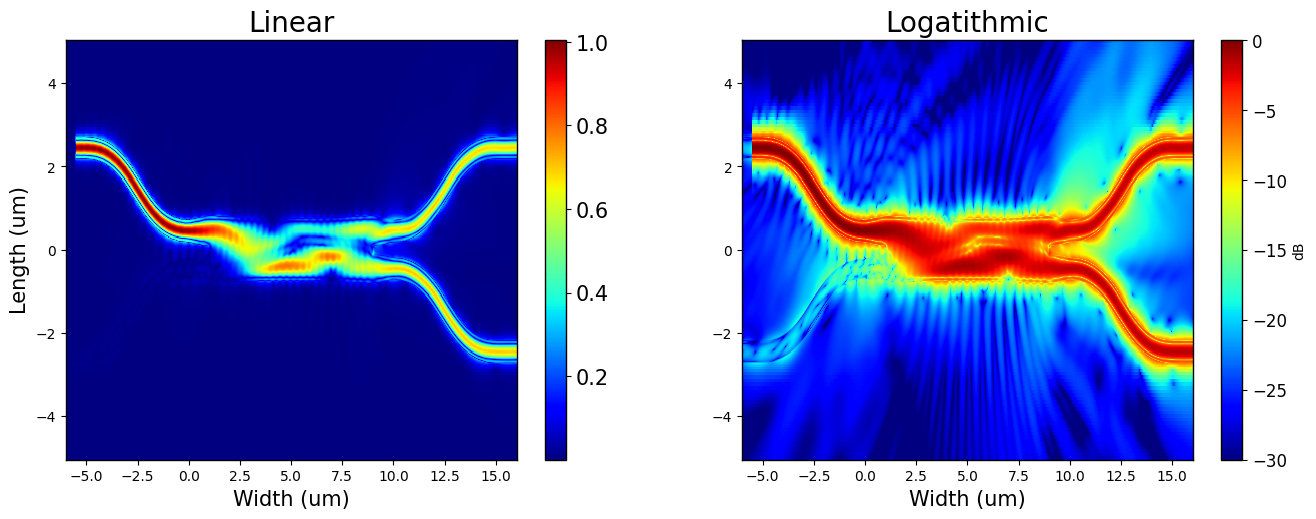

In [145]:
# Plot Linear Field Monitor Graph

figure1 = plt.figure(figsize=(16, 12), edgecolor= 'white', facecolor= 'white')

field = fdtd.getresult('monitor','E')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])
Elog = 10*np.log10(E)

plt.subplot(221)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Width (um)',fontsize=15)
plt.ylabel('Length (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Linear", fontsize = 20)

plt.subplot(222)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet', vmin = -30)
plt.xlabel('Width (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Logatithmic", fontsize = 20)

plt.savefig('../Documentation/Figures/FieldMonitor_MMI')

In [5]:
 # Getting results
S1 = fdtd.getresult('FDTD::ports::port 1', 'T')
S2 = fdtd.getresult('FDTD::ports::port 2', 'T')
S3 = fdtd.getresult('FDTD::ports::port 3', 'T') 
S4 = fdtd.getresult('FDTD::ports::port 4', 'T')

T1 = (S1['T'])
T1log = 10*np.log10(T1)
T2 = (S2['T'])
T2log = 10*np.log10(T2)
T3 = (S3['T'])
T3log = 10*np.log10(T3)
T4 = (S4['T'])
T4log = 10*np.log10(T4)

C:\Users\Léo\AppData\Local\Temp\ipykernel_10788\3636683062.py:10: RuntimeWarning: invalid value encountered in log10
  T2log = 10*np.log10(T2)


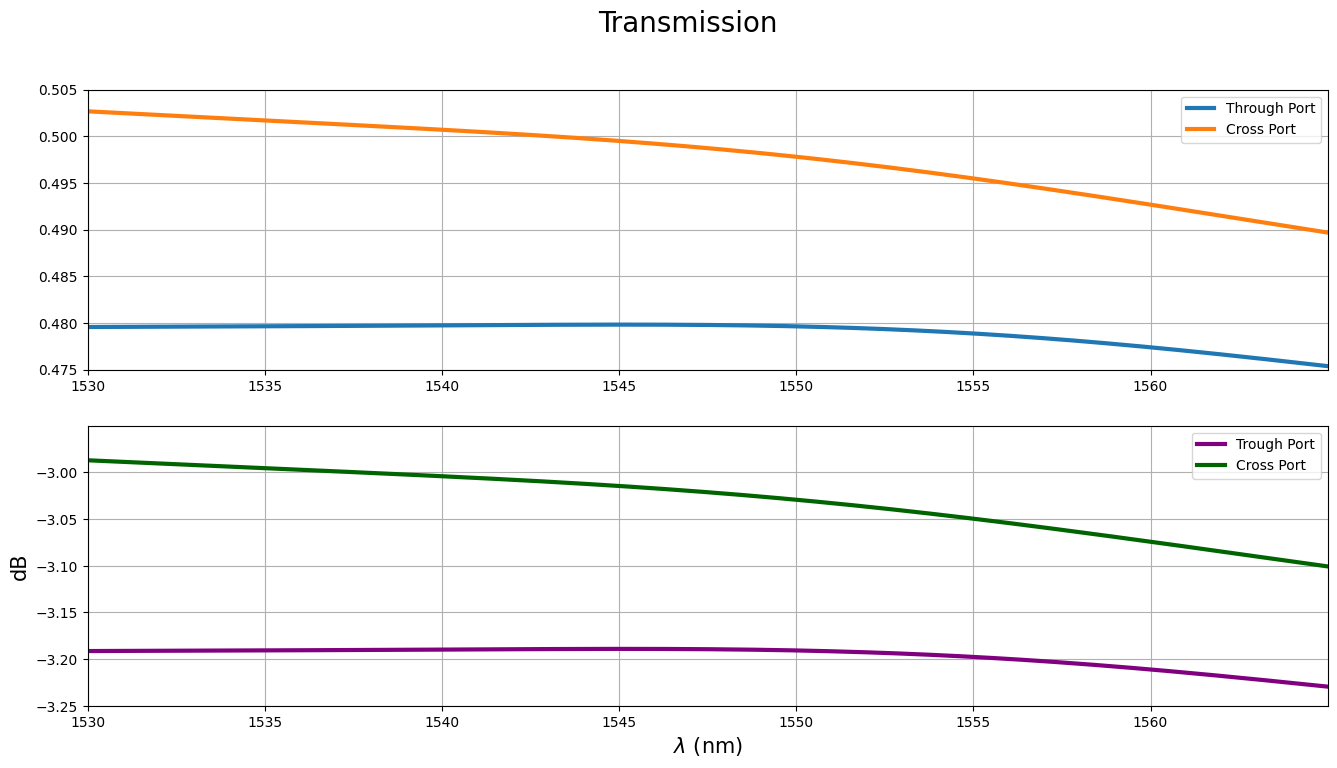

In [6]:
figure2, fig2 = plt.subplots(2,1,figsize=(16,8))

wavelength = S1['lambda']

figure2.suptitle('Transmission', size = 20)

fig2[0].plot(wavelength*1e9, T3, linewidth = 3, label = 'Through Port')
fig2[0].plot(wavelength*1e9, T4, linewidth = 3, label = 'Cross Port')
fig2[0].set_xticks(np.arange(1530,1565,5))
fig2[0].legend()
fig2[0].set_xlim(1530,1565)
fig2[0].grid()
fig2[0].set_yticks(np.arange(0.475, 0.505,0.005))
fig2[0].set_ylim(0.475,0.505)

fig2[1].plot(wavelength*1e9, T3log, linewidth = 3, label = 'Trough Port', color = 'purple')
fig2[1].plot(wavelength*1e9, T4log, linewidth = 3, label = 'Cross Port', color = 'darkgreen')
fig2[1].set_xticks(np.arange(1530,1565,5))
fig2[1].set_xlim(1530,1565)
fig2[1].legend()
fig2[1].grid()
fig2[1].set_yticks(np.arange(-3.25, -2.95,0.05))
fig2[1].set_ylim(-3.25,-2.95)
fig2[1].set_xlabel('$\lambda$ (nm)', size = 15)
fig2[1].set_ylabel('dB', size = 15)
plt.savefig('../Documentation/Figures/Transmission_MMI')

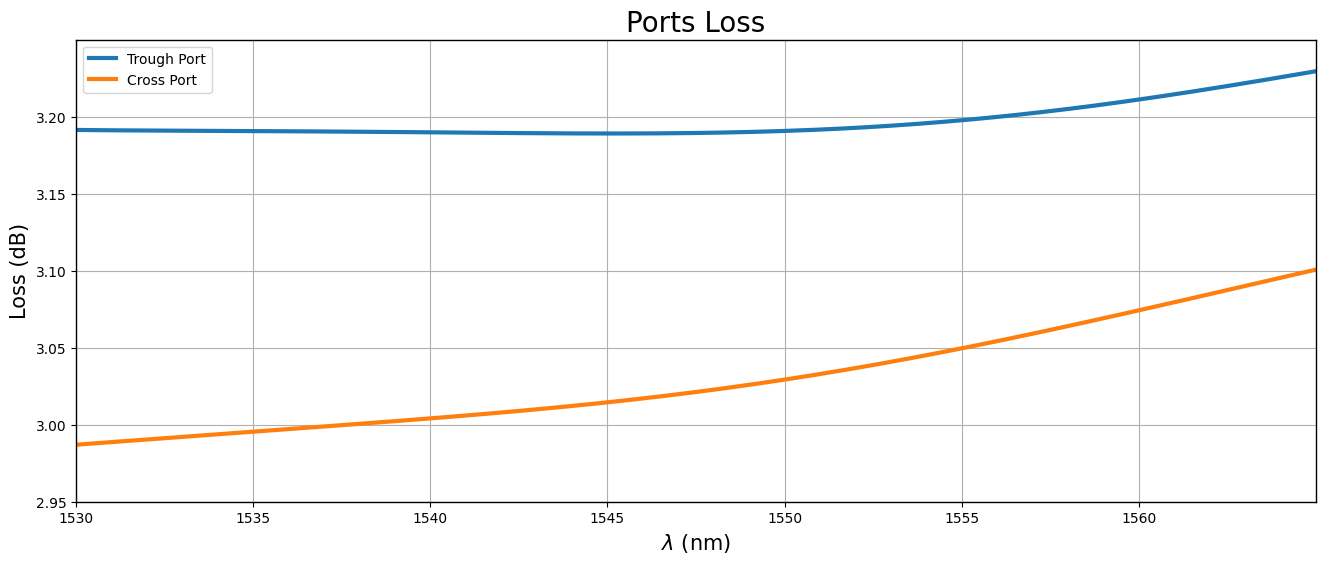

In [147]:
figure3 = plt.figure(figsize = (16,6))

plt.plot(wavelength*1e9, -T3log, linewidth = 3, label = 'Trough Port')
plt.plot(wavelength*1e9, -T4log, linewidth = 3, label = 'Cross Port')
plt.xticks(np.arange(1530,1565,5))
plt.title
plt.xlim(1530,1565)
plt.legend()
plt.grid()
plt.yticks(np.arange(2.95,3.25,0.05))
plt.ylim(2.95,3.25)
plt.title('Ports Loss', size = 20)
plt.xlabel('$\lambda$ (nm)', size = 15)
plt.ylabel('Loss (dB)', size = 15)
plt.savefig('../Documentation/Figures/Loss_MMI')

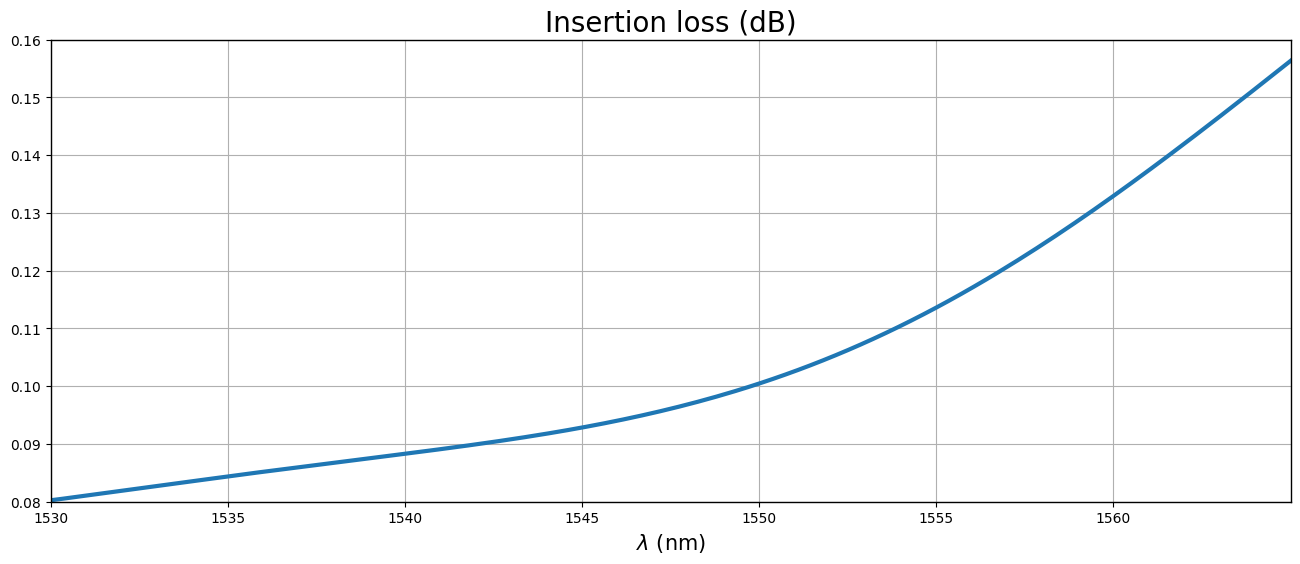

In [141]:
figure4 = plt.figure(figsize = (16,6))
loss =10*np.log10(T1)-(10*np.log10(T2 + T3 + T4))

plt.plot(wavelength*1e9, loss, linewidth = 3)
plt.xticks(np.arange(1530,1565,5))
plt.xlim(1530,1565)
plt.ylim(0.08, 0.16)
plt.grid()
plt.xlabel('$\lambda$ (nm)', size = 15)
plt.title('Insertion loss (dB)', size = 20)
plt.savefig('../Documentation/Figures/InsertionLoss_MMI')

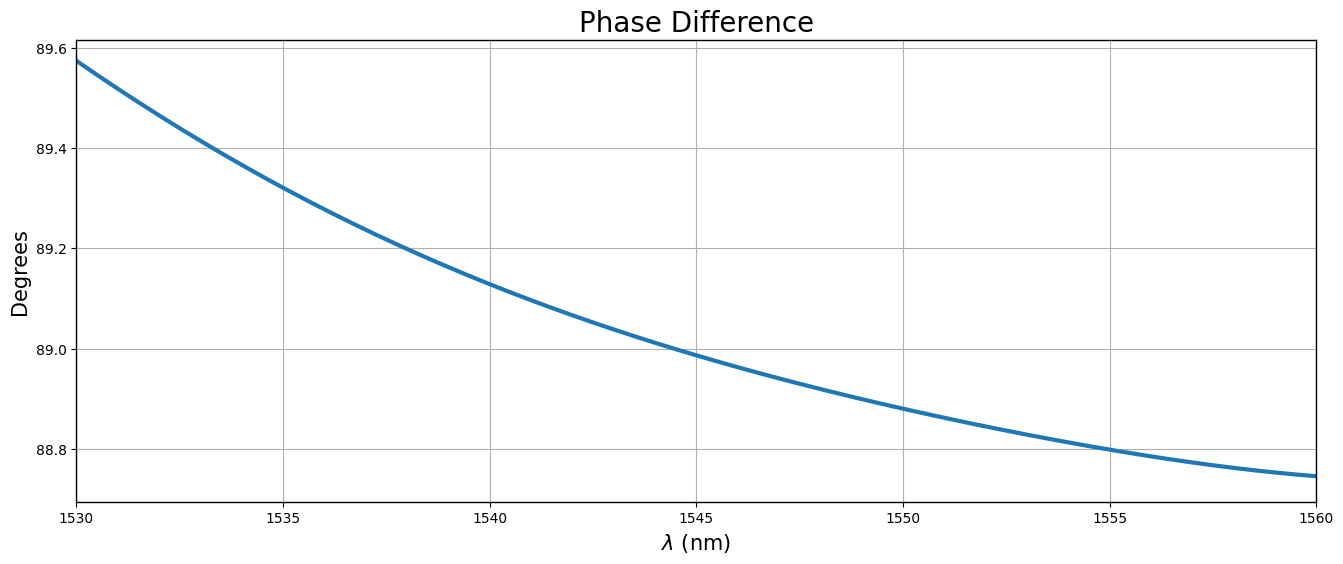

In [139]:
figure5 = plt.figure(figsize = (16,6))

S3 = fdtd.getresult('FDTD::ports::port 3','S')
S4 = fdtd.getresult('FDTD::ports::port 4', 'S')

Phase3 = fdtd.angle(S3['S'])
Phase4 = fdtd.angle(S4['S'])
Angle3 = fdtd.unwrap(Phase3)*180/(np.pi)
Angle4 = fdtd.unwrap(Phase4)*180/(np.pi)

plt.plot(wavelength*1e9, (Angle3 - Angle4), linewidth = 3)
plt.xlabel('$\lambda$ (nm)', size = 15)
plt.ylabel('Degrees', size = 15)
plt.title('Phase Difference', size = 20)
plt.xticks(np.arange(1530,1565,5))
plt.xlim(1530,1560)
plt.grid()
plt.savefig('../Documentation/Figures/PhaseDiference_MMI')

# Bend

In [3]:
fdtd = lumapi.FDTD('../CML/Bend.fsp')

In [33]:
radius = 4e-6
angle = 90
extension = 2e-6
port = 4e-6

In [129]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addobject('90_bend_wg')
fdtd.set({
    'x'          : 0,
    'y'          : 0,
    'z'          : 0,
    'base angle' : angle,
    'base height': height,
    'base width' : width,
    'radius'     : radius,
    'material'   : core,
    'name'       : 'Bend'
})

fdtd.unselectall()

fdtd.addrect()
fdtd.set({
    'x'        : -extension/2,
    'y'        : radius,
    'z'        : 0,
    'x span'   : extension,
    'y span'   : width,
    'z span'   : height,
    'material' : core,
    'name'     : 'Extension1'
})
fdtd.unselectall()

fdtd.addrect()
fdtd.set({
    'x'        : 2*extension,
    'y'        : -extension/2,
    'z'        : 0,
    'x span'   : width,
    'y span'   : extension,
    'z span'   : height,
    'material' : core,
    'name'     : 'Extension2'
})
fdtd.unselectall()

In [132]:
# Creating simulation region and ports

fdtd.unselectall()
fdtd.addfdtd()
fdtd.set({
    'x min'        : -extension,
    'x max'        : radius + extension,
    'y min'        : -extension,
    'y max'        : extension + radius,
    'z'            : 0,
    'z span'       : 5e-6,
    'mesh accuracy': 4, 
    'z min bc'     : 'PML', # Defining boundaries as PML
    'z max bc'     : 'PML',
    'y max bc'     : 'PML',
    'y min bc'     : 'PML',
    'background material' : substract # Using SiO2 on the substract
})

# Creating the ports
fdtd.unselectall()
fdtd.addport() 
fdtd.set({
    'x'      : -extension/2,
    'y'      : radius,
    'y span' : port,
    'z'      : 0,
    'z span' : port
})

fdtd.unselectall()
fdtd.addport()
fdtd.set({
    #'direction'      : 'Backward',
    'injection axis' :  'y-axis',
    'y'              : -extension/2,
    'x span'         :  port,
    'x'              : radius,
    'z'              : 0,
    'z span'         : port,
})

# Setting monitor points
fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points', 200)

fdtd.unselectall()
fdtd.addprofile() # Creating Field monitor
fdtd.set({
    'x min'        : -extension,
    'x max'        : radius + extension,
    'y min'        : -extension,
    'y max'        : extension + radius,
    'z'            : 0,
    'override global monitor settings':1,
    'frequency points': 200
})

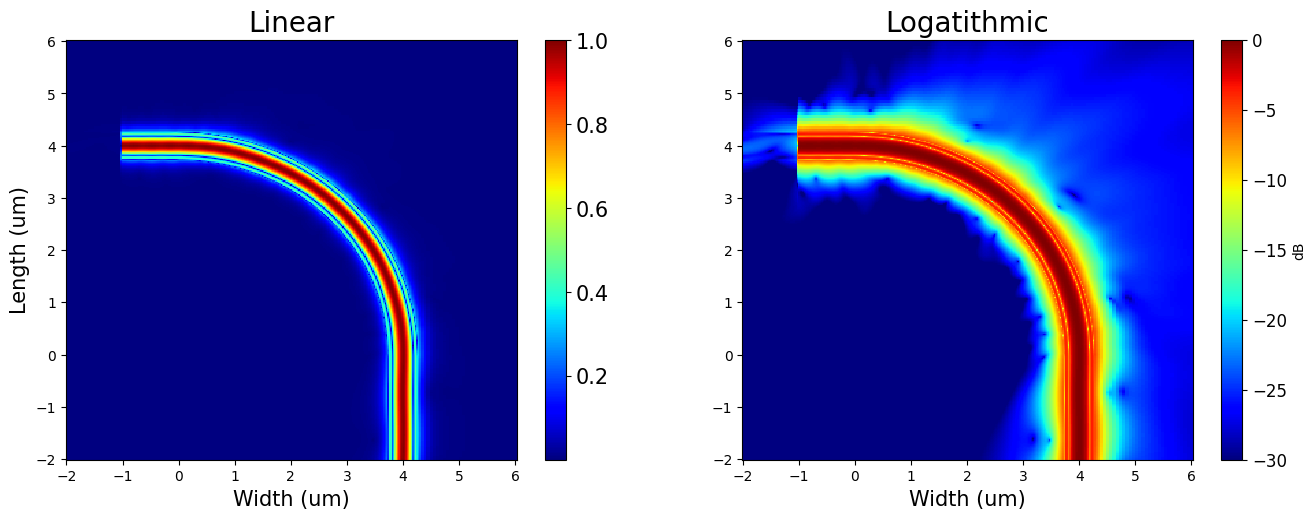

In [139]:
# Plot Linear Field Monitor Graph

figure6 = plt.figure(figsize=(16, 12), edgecolor= 'white', facecolor= 'white')

field = fdtd.getresult('monitor','E')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])
Elog = 10*np.log10(E)

plt.subplot(221)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Width (um)',fontsize=15)
plt.ylabel('Length (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Linear", fontsize = 20)

plt.subplot(222)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet', vmin = -30)
plt.xlabel('Width (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Logatithmic", fontsize = 20)

plt.savefig('../Documentation/Figures/FieldMonitor_Bend')

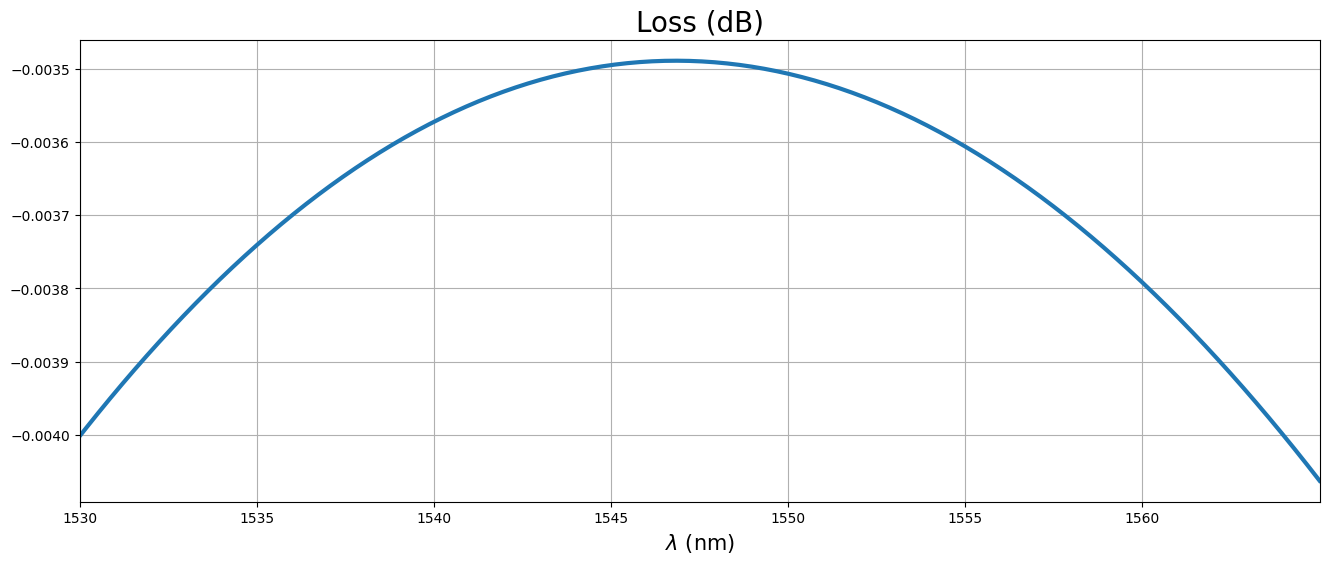

In [138]:
figure7 = plt.figure(figsize = (16,6))

R2 = fdtd.getresult('FDTD::ports::port 2', 'T')
T = 10*np.log10(abs(R2['T']))
wavelength = R2['lambda']

plt.plot(wavelength*1e9, T, linewidth = 3)
plt.xticks(np.arange(1530,1565,5))
plt.xlim(1530,1565)
plt.grid()
plt.xlabel('$\lambda$ (nm)', size = 15)
plt.title('Loss (dB)', size = 20)
plt.savefig('../Documentation/Figures/Loss_Bend')

# Y-Branch

In [2]:
fdtd = lumapi.FDTD(filename = '../CML/Y-branch.fsp')

In [34]:
W = [0.5e-6]
W = np.append(W,0.5e-6)
W = np.append(W,0.6e-6)
W = np.append(W,0.7e-6)
W = np.append(W,0.9e-6)
W = np.append(W,1.26e-6)
W = np.append(W,1.4e-6)
W = np.append(W,1.4e-6)
W = np.append(W,1.4e-6)
W = np.append(W,1.4e-6)
W = np.append(W,1.31e-6)
W = np.append(W,1.2e-6)
W = np.append(W,1.2e-6)
L = 2e-6
x = L/12

ext = 2e-6

In [79]:
fdtd.layoutmode()
fdtd.selectall()
fdtd.delete()

fdtd.addrect() # Generating input extensions
fdtd.set({
    'x min' : -ext,
    'x max' : 0,
    'y'     : 0,
    'y span': W[0],
    'z'     : 0,
    'z span': height,
    'material' : core,
    'name'     : 'Extension1'
})
fdtd.addtogroup('Extensions')
fdtd.unselectall()

for i in range(12): # Generating Y-Branch
    fdtd.addobject('linear_taper')
    fdtd.set({
        'x'         : (i+0.5)*x,
        'y'         : 0,
        'thickness' : height,
        'angle_side': 90,
        'width_l'   : W[i],
        'width_r'   : W[i+1],
        'z'         : 0,
        'len'       : x,
        'material'  : core,
        'name'      : 'Y-Branch' + str(i)
    })
    fdtd.unselectall()

# Y-Branch out extensions
fdtd.addrect()   
fdtd.set({
    'x min' : 12*x,
    'x max' : 12*x + ext/2,
    'y'     : 0.1e-6 + W[0]/2,
    'y span': W[0],
    'z'     : 0,
    'z span': height,
    'material' : core,
    'name'     : 'Extension2'
})
fdtd.addtogroup('Extensions')
fdtd.unselectall()

fdtd.addrect()
fdtd.set({
    'x min' : 12*x,
    'x max' : 12*x + ext/2,
    'y'     : -(0.1e-6 + W[0]/2),
    'y span': W[0],
    'z'     : 0,
    'z span': height,
    'material' : core,
    'name'     : 'Extension3'
})

fdtd.addtogroup('Extensions')
fdtd.unselectall()

# Bends and Extensions
fdtd.addobject('90_bend_wg') 
fdtd.set({
    'x'          : 12*x + ext/2,
    'y'          : -(0.1e-6 + W[0]/2) - radius,
    'z'          : 0,
    'base angle' : angle,
    'base height': height,
    'base width' : width,
    'radius'     : radius,
    'material'   : core,
    'name'       : 'Bend2'
})
fdtd.unselectall()

fdtd.addrect()
fdtd.set({
    'x'        : 12*x + ext/2 + radius,
    'y'        : extension/2 + radius +(0.1e-6 + W[0]/2),
    'z'        : 0,
    'x span'   : width,
    'y span'   : extension,
    'z span'   : height,
    'material' : core,
    'name'     : 'Extension4'
})
fdtd.addtogroup('Extensions')
fdtd.unselectall()

fdtd.addrect()
fdtd.set({
    'x'        : 12*x + ext/2 + radius,
    'y'        : -extension/2 - radius -(0.1e-6 + W[0]/2),
    'z'        : 0,
    'x span'   : width,
    'y span'   : extension,
    'z span'   : height,
    'material' : core,
    'name'     : 'Extension5'
})
fdtd.addtogroup('Extensions')
fdtd.unselectall()

fdtd.addobject('90_bend_wg')
fdtd.set({
    'x'          : 12*x + ext/2,
    'y'          : (0.1e-6 + W[0]/2) + radius,
    'z'          : 0,
    'start angle': 270,
    'base height': height,
    'base width' : width,
    'radius'     : radius,
    'material'   : core,
    'name'       : 'Bend1'
})
fdtd.unselectall()


In [80]:
# Creating simulation region and ports
fdtd.select('FDTD')
fdtd.delete()

fdtd.unselectall()
fdtd.addfdtd()
fdtd.set({
    'x min'        : -ext,
    'x max'        : 12*x + ext/2 + radius + ext,
    'y min'        : -ext - radius - (0.1e-6 + W[0]/2),
    'y max'        : ext + radius + 0.1e-6 + W[0]/2,
    'z'            : 0,
    'z span'       : 5e-6,
    'mesh accuracy': 4, 
    'z min bc'     : 'PML', # Defining boundaries as PML
    'z max bc'     : 'PML',
    'y max bc'     : 'PML',
    'y min bc'     : 'PML',
    'background material' : substract # Using SiO2 on the substract
})

# Creating the ports
fdtd.unselectall()
fdtd.addport() 
fdtd.set({
    'x'      : -ext + 0.2e-6,
    'y'      : 0,
    'y span' : port,
    'z'      : 0,
    'z span' : port
})

# Creating the ports
fdtd.unselectall()
fdtd.addport() 
fdtd.set({
    'direction'      : 'Backward',
    'injection axis' :  'y-axis',
    'x'      : 12*x + ext/2 + radius,
    'y'      : extension/2 + radius +(0.1e-6 + W[0]/2),
    'x span' : port,
    'z'      : 0,
    'z span' : port
})

fdtd.unselectall()
fdtd.addport()
fdtd.set({
    #'direction'      : 'Backward',
    'injection axis' :  'y-axis',
    'y'              : -extension/2 - radius -(0.1e-6 + W[0]/2),
    'x span'         :  port,
    'x'              : 12*x + ext/2 + radius,
    'z'              : 0,
    'z span'         : port,
})

# Setting monitor points
fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points', 200)

fdtd.unselectall()
fdtd.addprofile() # Creating Field monitor
fdtd.set({
    'x min'        : -ext,
    'x max'        : 12*x + ext/2 + radius + ext,
    'y min'        : -ext - radius - (0.1e-6 + W[0]/2),
    'y max'        : ext + radius + 0.1e-6 + W[0]/2,
    'z'            : 0,
    'override global monitor settings':1,
    'frequency points': 200
})

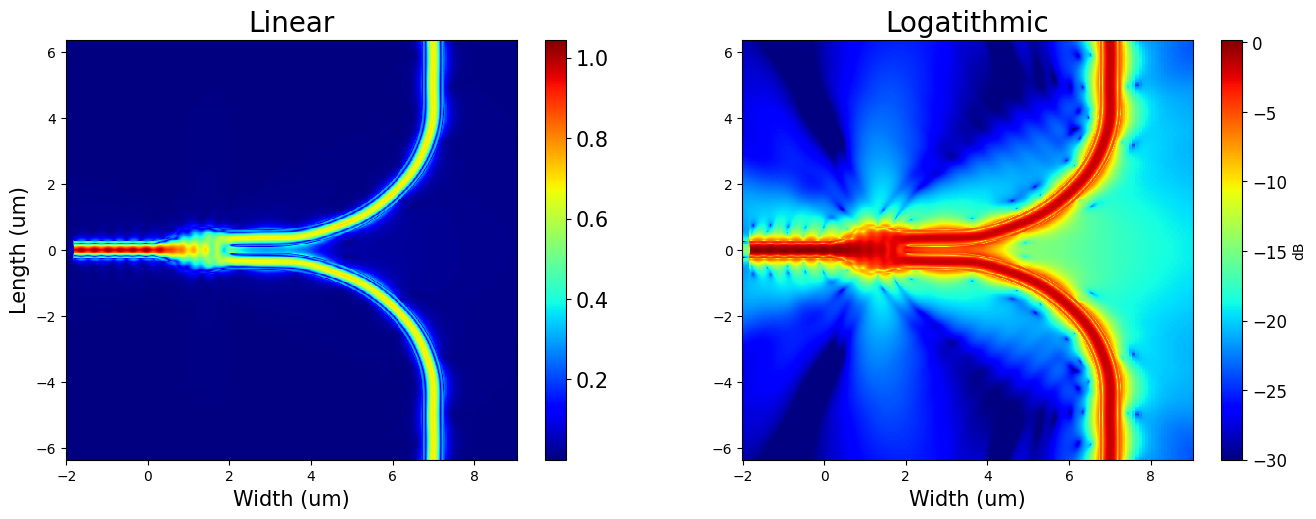

In [81]:
# Plot Linear Field Monitor Graph

figure8 = plt.figure(figsize=(16, 12), edgecolor= 'white', facecolor= 'white')

field = fdtd.getresult('monitor','E')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])
Elog = 10*np.log10(E)

plt.subplot(221)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Width (um)',fontsize=15)
plt.ylabel('Length (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Linear", fontsize = 20)

plt.subplot(222)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet', vmin = -30)
plt.xlabel('Width (um)',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Logatithmic", fontsize = 20)

plt.savefig('../Documentation/Figures/FieldMonitor_Y-Branch')

In [90]:
 # Getting results
S1 = fdtd.getresult('FDTD::ports::port 1', 'T')
S2 = fdtd.getresult('FDTD::ports::port 2', 'T')
S3 = fdtd.getresult('FDTD::ports::port 3', 'T') 

T1 = abs(S1['T'])
T1log = 10*np.log10(T1)
T2 = abs(S2['T'])
T2log = 10*np.log10(T2)
T3 = abs(S3['T'])
T3log = 10*np.log10(T3)

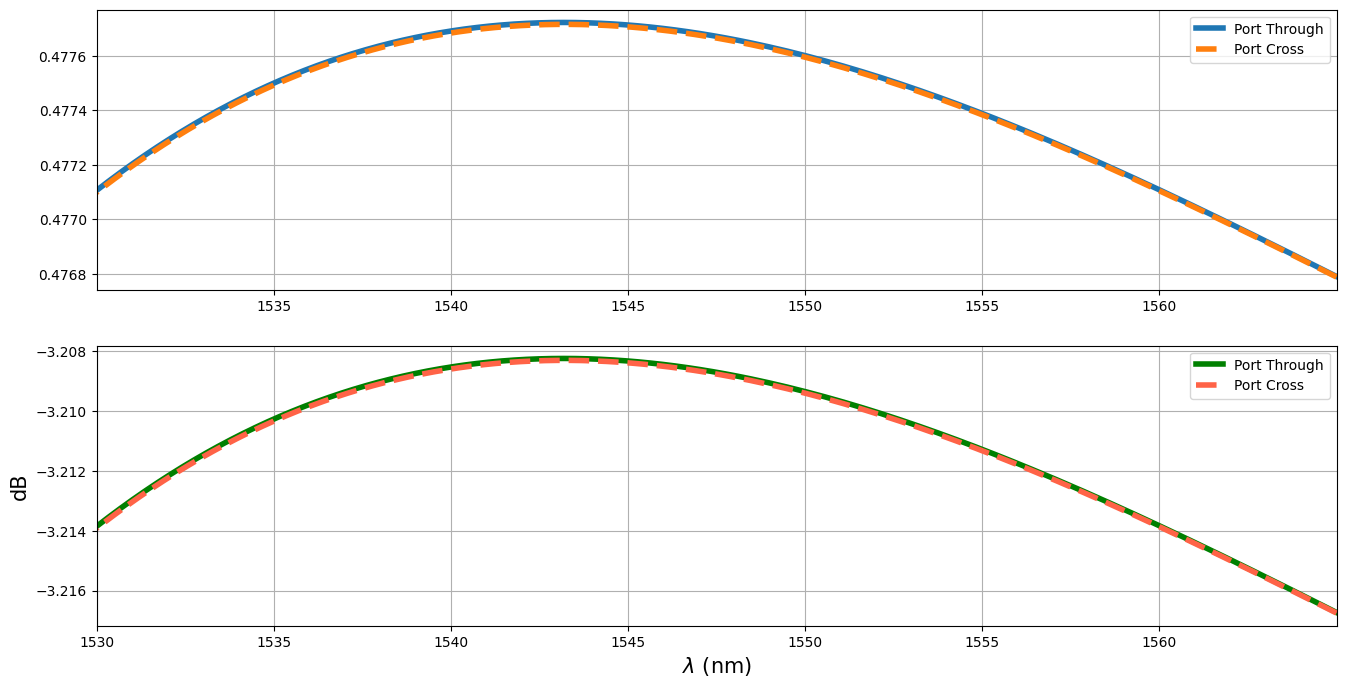

In [132]:
figure9, fig9 = plt.subplots(2,1,figsize=(16,8))

wavelength = S1['lambda']

figure8.suptitle('Transmission', size = 20)


fig9[0].plot(wavelength*1e9, T2,linewidth = 4, label = 'Port Through')
fig9[0].plot(wavelength*1e9, T3, '--', linewidth = 4, label = 'Port Cross')
fig9[0].set_xticks(np.arange(1535,1565,5))
fig9[0].legend()
fig9[0].set_xlim(1530,1565)
fig9[0].grid()

fig9[1].plot(wavelength*1e9, T2log, linewidth = 4, label = 'Port Through', color = 'green')
fig9[1].plot(wavelength*1e9, T3log,'--', linewidth = 4, label = 'Port Cross', color = 'tomato')
fig9[1].set_xticks(np.arange(1530,1565,5))
fig9[1].set_xlim(1530,1565)
fig9[1].legend()
fig9[1].grid()
fig9[1].set_xlabel('$\lambda$ (nm)', size = 15)
fig9[1].set_ylabel('dB', size = 15)
plt.savefig('../Documentation/Figures/Transmission_Y-Branch')

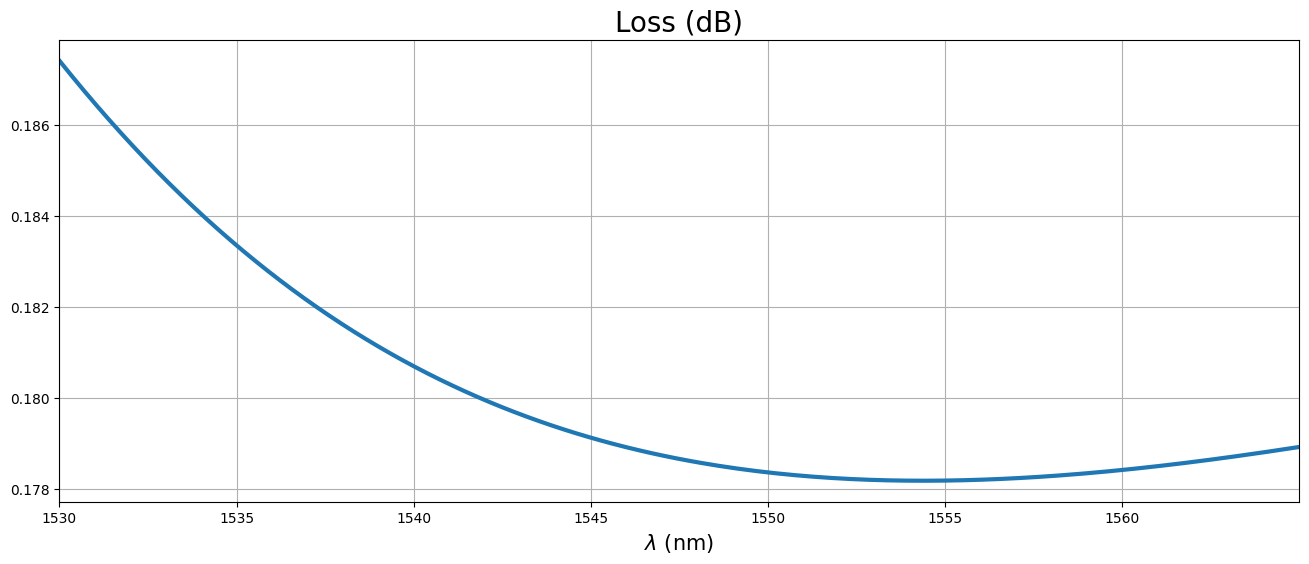

In [142]:
figure10 = plt.figure(figsize = (16,6))

Loss = T1log - 10*np.log10(T2+T3)

plt.plot(wavelength*1e9, Loss, linewidth = 3)
plt.xticks(np.arange(1530,1565,5))
plt.xlim(1530,1565)
plt.grid()
plt.xlabel('$\lambda$ (nm)', size = 15)
plt.title('Loss (dB)', size = 20)
plt.savefig('../Documentation/Figures/Loss_Y-Branch')